# My exploration with JS in VSCode using Jupyter

## Install Deno

Deno has a Jupyter kernel. First [install Deno](https://docs.deno.com/runtime/getting_started/installation/).

```sh
curl -fsSL https://deno.land/install.sh | sh
```

Then [install the kernel](https://docs.deno.com/runtime/reference/cli/jupyter/).

```sh
deno jupyter --unstable --install
```

## VSCode support

Now install the VSCode `Jupyter` extension. You can also install the `Deno` extension if you want to have the Deno Language Server installed.

With Jupyter installed you can select `Deno` as your kernel within your notebook.

> 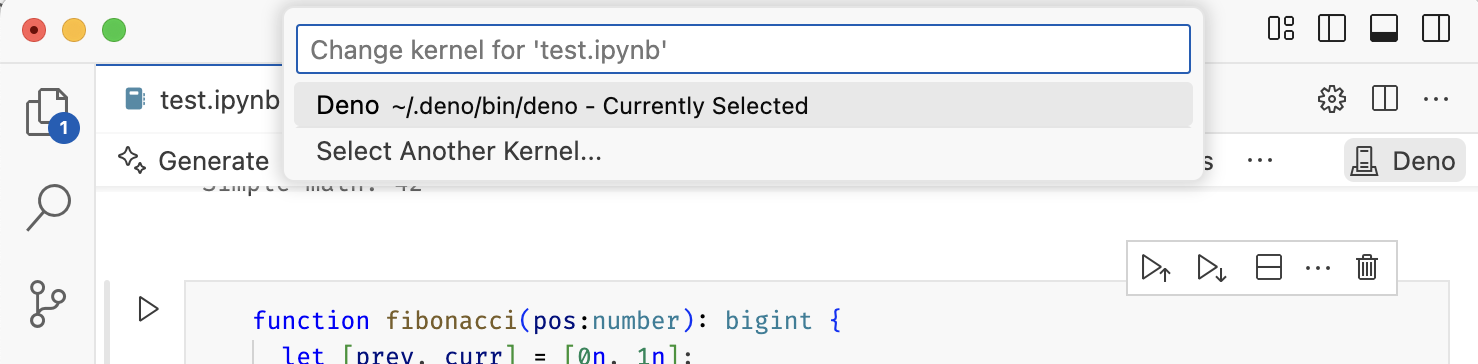

## Using JavaScript

With Deno installed you can run any JavaScript you would like.

In [ ]:
console.log(`Simple math: ${11+31}`)

In [ ]:
function fibonacci(pos:number): bigint {
  let [prev, curr] = [0n, 1n];
  for (let i = 2; i <= pos; i++) {
    [prev, curr] = [curr, prev + curr];
  }
  return pos <= 0 ? prev : curr;
}

const result = fibonacci(500);
console.log(`Fibonacci: ${result}`);

## Interacting with the notebook

`Deno.jupyter` also allows you to interact with the notebook to render all sorts of things.

In [ ]:
const x = 42;
await Deno.jupyter.display({
        // Plain text content
        "text/plain": "Hello world!",
  
        // HTML output
        "text/html": `<h3 style='color:green'>Hello ${x}!</h3>`,
}, { raw: true });

In [ ]:
await Deno.jupyter.display({
  "text/plain": "Hello, text!",
  "text/htmlx": "<h1>Hello, HTML!<h1",
  "text/markdownx": "# Hello, markdown!",
}, { raw: true });

### Render different media types

In [ ]:
await Deno.jupyter.svg`
    <svg width="100" height="100" xmlns="http://www.w3.org/2000/svg">
      <rect width="100" height="100" style="fill:blue;"/>
    </svg>`;


In [ ]:
Deno.jupyter.image("./test.png");

### Update asynchronously

In [ ]:
await Deno.jupyter.broadcast("display_data", {
    data: { "text/html": "<b>Fishing...</b>" },
    metadata: {},
    transient: { display_id: "progress" },
  });

// Pretend we're doing an expensive compute
await new Promise((resolve) => setTimeout(resolve, 1500));

await Deno.jupyter.broadcast("update_display_data", {
data: { "text/html": "<b>Caught</b>" },
metadata: {},
transient: { display_id: "progress" },
});

### Generate Plots

In [ ]:
import { document, penguins } from "jsr:@ry/jupyter-helper";
import * as Plot from "npm:@observablehq/plot";

let p = await penguins();

Plot.plot({
  marks: [
    Plot.dot(p.toRecords(), {
      x: "culmen_depth_mm",
      y: "culmen_length_mm",
      fill: "species",
    }),
  ],
  document,
});